# Sentiment Analysis on Mainstream Video Game Twits

- Keeley: put their contribution here
- Goar: put their contribution here
- Isaac: put their contribution here
- Jim: put their contribution here
- Vik: put their contribution here 


# Introduction

### This project is about analyzing Twitter tweets' sentiments about a selection of video games. The video games to be analyzed are: 
##### Borderlands, Call of Duty Black Ops Cold War, Overwatch, NBA2k, Dota 2, World of War Craft, CS-GO, Assasin's Creed, Apex Legends, League of Legends, Fortnite, Battlefield, Heartstone, PUB G, FIFA, RDR, Rainbow Six, GTA, Madden NFL, Cyberpunk 2077, Ghost Recon, and Hearthstone. 
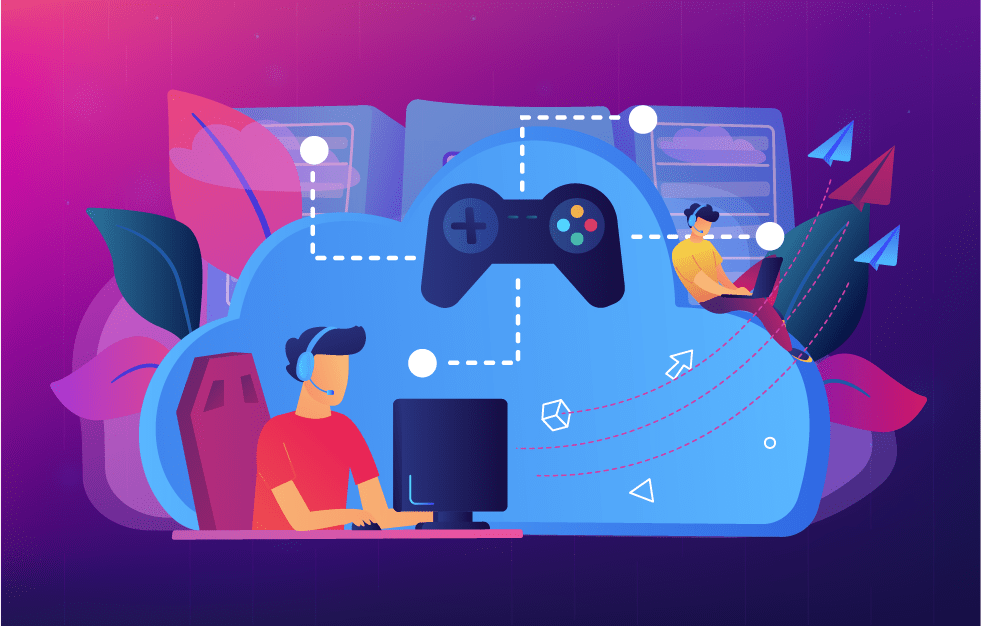

# Research Question
##### Which video game will have the most positive sentiment analysis on Twitter?
##### Which video game will have the most negative sentiment analysis?


# Dataset Description

In [42]:
# Install necessary libraries
!pip install nltk
!pip install -U textblob

In [16]:
# import necessary functions required for a reproducibile sentiment analysis using social media data
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import re

#### df.describe - rename columns,

In [17]:
# convert the csv with comments to Pandas Datafram (vg stands for video game) 
vg = pd.read_csv('twitter_training.csv')

In [18]:
# display the ordered data from the top
vg.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [43]:
# retrieves the column names and assign them to the variable "column_names"
column_names = vg.columns

column_names

Index(['Sentiment_Batch', 'Video_Game', 'Sentiment', 'Tweet'], dtype='object')

In [20]:
print(vg['im getting on borderlands and i will murder you all ,'])

0        I am coming to the borders and I will kill you...
1        im getting on borderlands and i will kill you ...
2        im coming on borderlands and i will murder you...
3        im getting on borderlands 2 and i will murder ...
4        im getting into borderlands and i can murder y...
                               ...                        
74676    Just realized that the Windows partition of my...
74677    Just realized that my Mac window partition is ...
74678    Just realized the windows partition of my Mac ...
74679    Just realized between the windows partition of...
74680    Just like the windows partition of my Mac is l...
Name: im getting on borderlands and i will murder you all ,, Length: 74681, dtype: object


In [44]:
# rename columns to clear categories
vg.rename(columns={'2401': 'Sentiment_Batch', 'Borderlands': 'Video_Game', 'Positive': 'Sentiment', 'im getting on borderlands and i will murder you all ,': 'Tweet'}, inplace=True)

In [45]:
# display renamed ordered data from the top
vg.head()

,Sentiment_Batch,Video_Game,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [46]:
# generate descriptive statistics, display data distribution summary
vg.describe()

,Sentiment_Batch
count,73995.000000
mean,6430.333685
std,3737.655932
min,1.000000
25%,3194.000000
50%,6418.000000
75%,9595.000000
max,13200.000000


# Preprocessing

In [24]:
# Drop Missing Data
vg.dropna(inplace=True)

# Drop Duplicates
vg.drop_duplicates()


,Sentiment_Batch,Video_Game,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [25]:
# delete irrelevant subjects
values_to_delete = ['Nvidia', 'johnson&johnson','Facebook', 'HomeDepot', 'Verizon', 'Microsoft', 'Google', 'PlayStation5(PS5)', 'Xbox(Xseries)', 'Amazon']
filtered_vg = vg[~vg['Video_Game'].isin(values_to_delete)]

In [26]:
# text cleaning - remove mentions, signs, spaces, and unknown values
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'http\S+|www\S+|https\S+|pic\S+', '', text, flags=re.MULTILINE)  # remove URLs
        text = re.sub(r'@\w+', '', text)  # remove mentions
        text = re.sub(r'\s*@+\s*', ' ', text) # remove mentions with extra spaces
        text = re.sub(r'#\w+', '', text)  # remove hashtags
        text = re.sub(r'\s+', ' ', text)  # remove extra spaces
        text = re.sub(r'-', '', text) #remove hyphens
        text = re.sub(r'[><]', '', text) #remove greater/less than signs
        text = re.sub(r'[\\/]', '', text) #remove /\ signs
        text = re.sub(r'\.', '', text) # remove "."
        text = re.sub(r'\,', '', text) #remove ","
        text = re.sub(r'unk', '', text) # remove "unk"        
        return text.strip()
    else:
        return text
    

filtered_vg['Clean_Text'] = filtered_vg['Tweet'].apply(clean_text)

/tmp/ipykernel_758/606862506.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_vg['Clean_Text'] = filtered_vg['Tweet'].apply(clean_text)


# Analysis

In [27]:
# Define a function for sentiment polarity analysis using TextBlob
def get_sentiment_textblob(text): 
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0: 
        return "Negative" 
    else: 
        return "Neutral" 


In [47]:
# create new column to store sentiment analysis results from applying the function to the cleaned text 
filtered_vg["Sentiment_Textblob"] = filtered_vg["Clean_Text"].apply(get_sentiment_textblob)

/tmp/ipykernel_758/3249666557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_vg["Sentiment_Textblob"] = filtered_vg["Clean_Text"].apply(get_sentiment_textblob)


In [51]:
# display preview of the sentiment analysis
filtered_vg.head()

,Sentiment_Batch,Video_Game,Sentiment,Tweet,Clean_Text,Sentiment_Textblob
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...,Neutral
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all,Neutral
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,Neutral
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...,Neutral
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...,Neutral


In [30]:
# delete useless columns
columns_to_delete = ['Sentiment_Batch', 'Sentiment', 'Tweet'] 
sentiment_data = filtered_vg.drop(columns=columns_to_delete)

In [50]:
# display preview of final cleaned sentiment analysis
sentiment_data.head()

,Video_Game,Clean_Text,Sentiment_Textblob
0,Borderlands,I am coming to the borders and I will kill you...,Neutral
1,Borderlands,im getting on borderlands and i will kill you all,Neutral
2,Borderlands,im coming on borderlands and i will murder you...,Neutral
3,Borderlands,im getting on borderlands 2 and i will murder ...,Neutral
4,Borderlands,im getting into borderlands and i can murder y...,Neutral


# Visualization

In [32]:
# Define the colors for positive and negative sentiments
sentiment_colors = {
    'Positive': 'green',
    'Negative': 'red',
    'Neutral' : 'blue'
}

In [33]:
print(sentiment_colors['Positive'])

green


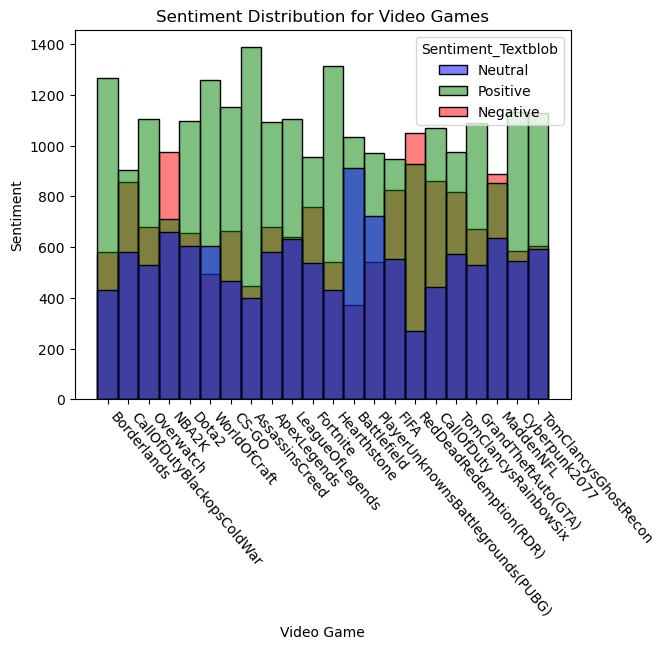

In [52]:
# Use function from Seaborn library to create a histogram graph illustrating the overall sentiment distribution of all games.
sns.histplot(x='Video_Game', hue='Sentiment_Textblob', data=sentiment_data, palette=sentiment_colors)
plt.xticks(rotation= -50, ha='left')
plt.xlabel('Video Game')
plt.ylabel('Sentiment')
plt.title('Sentiment Distribution for Video Games')
plt.show()

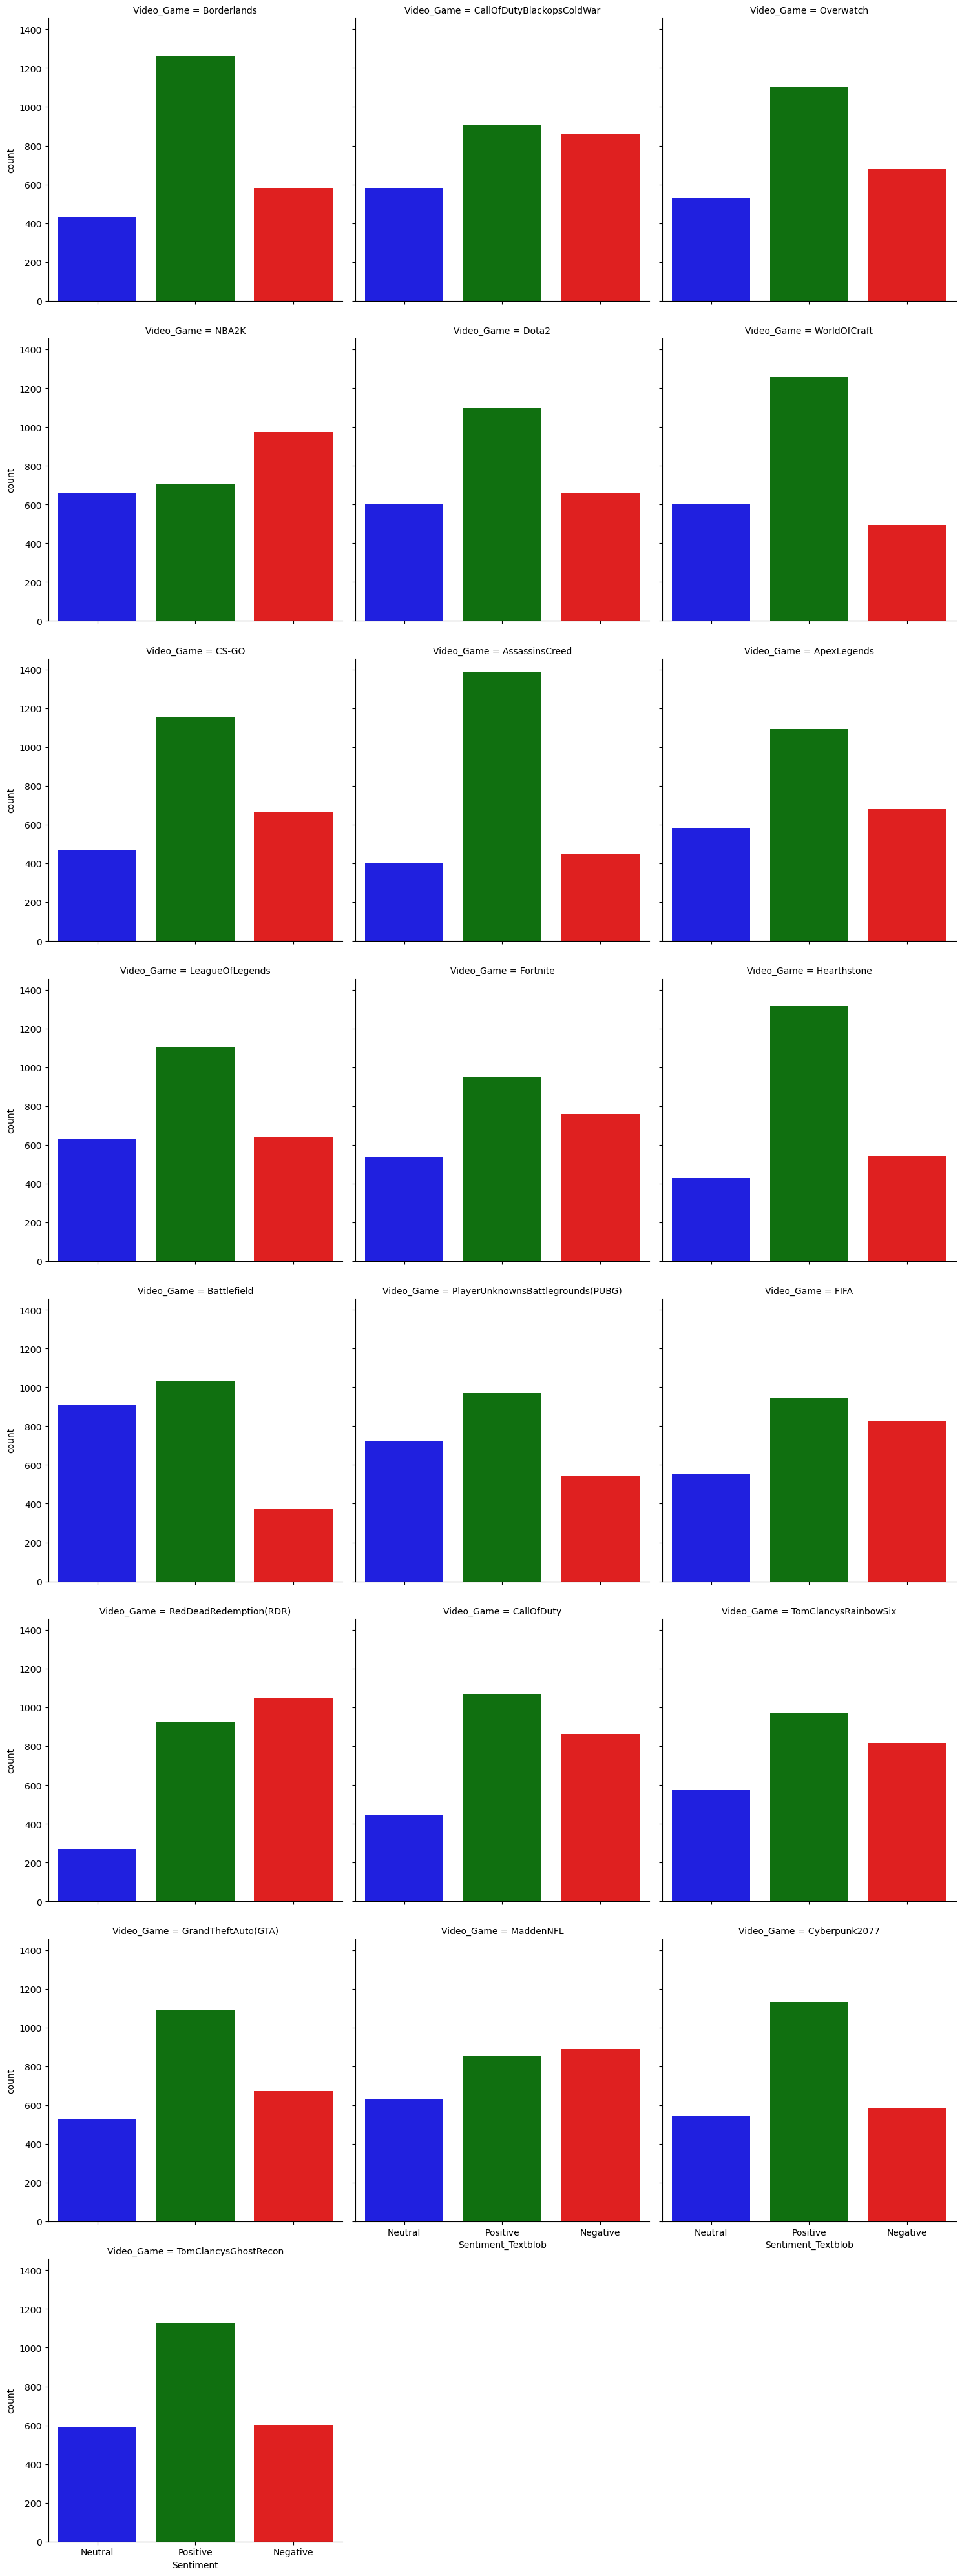

In [53]:
# use function from Seaborn library to create juxtaposable categorical plots illustrating sentiment distribution of individual games. 
sns.catplot(data=sentiment_data, kind= "count", col='Video_Game', x= 'Sentiment_Textblob', col_wrap=3, palette=sentiment_colors)
plt.xlabel('Sentiment')
plt.show()

# Results/Findings

#### Define function to find which video game has the most positive sentiment analyses

In [36]:
def count_most_occurrences(df, target_column, search_column, search_string):
    # Filter the DataFrame to include only rows where the search column contains the search string
    filtered_sentiment_data = sentiment_data[sentiment_data['Sentiment_Textblob'].str.contains("Positive", case=False, na=False)]
    
    # Count the occurrences of each value in the target column
    counts = filtered_sentiment_data['Video_Game'].value_counts()
    
    # Get the value with the highest count
    most_common_value = counts.idxmax()
    
    return most_common_value

#### Use function to make a new DataFrame that gives the answer to which video game has the most positive analyses

In [37]:
most_common_positive = count_most_occurrences(sentiment_data, 'Video_Game', 'Sentiment_Textblob', "Positive")
most_common_positive

'AssassinsCreed'

#### Make a new DataFrame and function that tells us the # of each sentiment analysis that AssassinsCreed has

In [38]:
AssassinsCreed_filter = sentiment_data[sentiment_data['Video_Game'] == 'AssassinsCreed']
AssasinsCreedCount = AssassinsCreed_filter['Sentiment_Textblob'].value_counts()
AssasinsCreedCount

Positive    1387
Negative     448
Neutral      399
Name: Sentiment_Textblob, dtype: int64

### Define a function to find which video game has the most negative sentiment analyses

In [39]:
def count_most_occurrences2(df, target_column, search_column, search_string):
    # Filter the DataFrame to include only rows where the search column contains the search string
    filtered_sentiment_data = sentiment_data[sentiment_data['Sentiment_Textblob'].str.contains("Negative", case=False, na=False)]
    
    # Count the occurrences of each value in the target column
    counts = filtered_sentiment_data['Video_Game'].value_counts()
    
    # Get the value with the highest count
    most_common_value = counts.idxmax()
    
    return most_common_value

#### Use function to make a new DataFrame that gives the answer to which video game has the most negative analyses

In [40]:
most_common_negative = count_most_occurrences2(sentiment_data, 'Video_Game', 'Sentiment_Textblob', "Negative")
most_common_negative

'RedDeadRedemption(RDR)'

#### Make a new DataFrame that gives us the # of each sentiment analysis that AssassinsCreed has

In [41]:
RDR_filter = sentiment_data[sentiment_data['Video_Game'] == 'RedDeadRedemption(RDR)']
RDRCount = RDR_filter['Sentiment_Textblob'].value_counts()
RDRCount

Negative    1050
Positive     928
Neutral      271
Name: Sentiment_Textblob, dtype: int64

## In Conclusion 

#### AssassinsCreed was the video game that had the most positive player sentiments among relevent Twitter data.

#### RedDeadRedemption was the video game that had the most negative player sentiments among relevent Twitter data.

# Contribution